In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk

# Download required NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# Load the dataset
file_path = r"C:\Users\lenovo\Downloads\intel_xeon_processors_v1_6.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,Product,Status,Release Date,Cores,Threads,Lithography(nm),Max. Turbo Freq.(GHz),Base Freq.(GHz),TDP(W),Cache(MB),Cache Info,Integrated Graphics
0,Xeon Platinum 8444H,Launched,Q1'23,16,32.0,7.0,4.0,2.9,270.0,45.0,NaN,NaN
1,Xeon Platinum 8450H,Launched,Q1'23,28,56.0,7.0,3.5,2.0,250.0,75.0,NaN,NaN
2,Xeon Platinum 8452Y,Launched,Q1'23,36,72.0,7.0,3.2,2.0,300.0,67.5,NaN,NaN
3,Xeon Platinum 8454H,Launched,Q1'23,32,64.0,7.0,3.4,2.1,270.0,82.5,NaN,NaN
4,Xeon Platinum 8458P,Launched,Q1'23,44,88.0,7.0,3.8,2.7,350.0,82.5,NaN,NaN


In [3]:
import pandas as pd

# Sample DataFrame for demonstration
data = {
    'review': ["This is a great product!", "Not good at all.", "Would buy again!", "Worst experience ever."],
    'rating': [5, 1, 4, 1]
}
df = pd.DataFrame(data)

# Print the columns to verify
print(df.columns)

# Print the first few rows to inspect the DataFrame
print(df.head())

# Text cleaning function
def clean_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    return text

# Apply the text cleaning function
df['cleaned_review'] = df['review'].apply(clean_text)

# Tokenization, removing stopwords, and lemmatization
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return ' '.join(tokens)

# Apply preprocessing
df['processed_review'] = df['cleaned_review'].apply(preprocess_text)

print(df)


Index(['review', 'rating'], dtype='object')
                     review  rating
0  This is a great product!       5
1          Not good at all.       1
2          Would buy again!       4
3    Worst experience ever.       1
                     review  rating           cleaned_review  \
0  This is a great product!       5  this is a great product   
1          Not good at all.       1          not good at all   
2          Would buy again!       4          would buy again   
3    Worst experience ever.       1    worst experience ever   

        processed_review  
0          great product  
1                   good  
2              would buy  
3  worst experience ever  


In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample DataFrame for demonstration
data = {
    'processed_review': ["this is a great product", "not good at all", "would buy again", "worst experience ever"],
    'sentiment': ["positive", "negative", "positive", "negative"]
}
df = pd.DataFrame(data)

# Print the columns to verify
print(df.columns)

# Print the first few rows to inspect the DataFrame
print(df.head())

# Check if 'sentiment' column exists
if 'sentiment' in df.columns:
    # TF-IDF Vectorization
    tfidf = TfidfVectorizer()
    X = tfidf.fit_transform(df['processed_review']).toarray()

    # Define the target variable
    y = df['sentiment'].map({'positive': 1, 'negative': 0})
    
    print(X)
    print(y)
else:
    print("The 'sentiment' column does not exist in the DataFrame.")


Index(['processed_review', 'sentiment'], dtype='object')
          processed_review sentiment
0  this is a great product  positive
1          not good at all  negative
2          would buy again  positive
3    worst experience ever  negative
[[0.         0.         0.         0.         0.         0.
  0.         0.5        0.5        0.         0.5        0.5
  0.         0.        ]
 [0.         0.5        0.5        0.         0.         0.
  0.5        0.         0.         0.5        0.         0.
  0.         0.        ]
 [0.57735027 0.         0.         0.57735027 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.57735027]
 [0.         0.         0.         0.         0.57735027 0.57735027
  0.         0.         0.         0.         0.         0.
  0.57735027 0.        ]]
0    1
1    0
2    1
3    0
Name: sentiment, dtype: int64


In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Accuracy: 0.0
Confusion Matrix:
 [[0 1]
 [0 0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       1.0
           1       0.00      1.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.50      0.50      0.00       1.0
weighted avg       1.00      0.00      0.00       1.0



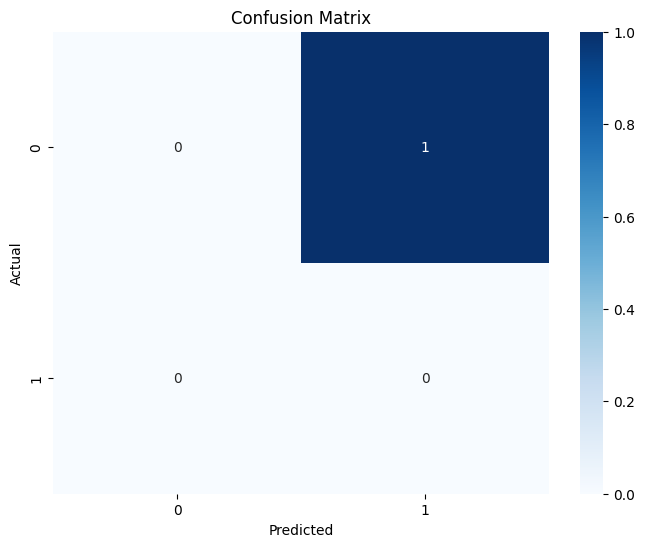

In [7]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()